# 1.0 Install and Imports

In [6]:
!pip install nxviz

In [7]:
pip install unidecode

In [9]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nxviz
from nxviz import CircosPlot
import matplotlib.patches as mpatches
import seaborn as sns
from unidecode import unidecode

# 2.0 Getting and Preparing Data

## 2.1 Import csv

In [10]:
#Airports coordenates
airports_coordenates_db = pd.read_csv("/content/AerodromosPublicos.csv", sep=';')

traffic_db_2019 = pd.read_csv("/content/resumo_anual_2019.csv", encoding="Latin-1", sep=';')
traffic_db_2020 = pd.read_csv("/content/resumo_anual_2020.csv", encoding="Latin-1", sep=';')

## 2.2 Cleaning columns name

In [11]:
def clean_col(col):
    col = col.strip()
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.replace(" ","_")
    col = unidecode(col)
    col = col.lower()
    return col

In [12]:
airports_coordenates_db.columns = [clean_col(c) for c in airports_coordenates_db.columns]
airports_coordenates_db.columns.tolist()

['codigo_oaci',
 'ciad',
 'nome',
 'municipio',
 'uf',
 'municipio_servido',
 'uf_servido',
 'latgeopoint',
 'longeopoint',
 'latitude',
 'longitude',
 'altitude',
 'operacao_diurna',
 'operacao_noturna',
 'designacao_1',
 'comprimento_1',
 'largura_1',
 'resistencia_1',
 'superficie_1',
 'designacao_2',
 'comprimento2',
 'largura_2',
 'resistencia_2',
 'superficie_2',
 'situacao',
 'validadedoregistro',
 'portariaderegistro',
 'link_portaria']

In [13]:
airports_coordenates = airports_coordenates_db.iloc[:,[0,2,3,4,7,8]].copy()
airports_coordenates.columns = ["airport_code", "airport_name", "city", "state", "lat", "lon"]
airports_coordenates.head()

,airport_code,airport_name,city,state,lat,lon
0,SBRB,Plácido de Castro,RIO BRANCO,Acre,-9.868333,-67.898056
1,SNGA,Guarapari,GUARAPARI,Espírito Santo,-20.646389,-40.491667
2,SBIZ,Prefeito Renato Moreira,IMPERATRIZ,Maranhão,-5.530556,-47.458333
3,SBPC,Embaixador Walther Moreira Salles,POÇOS DE CALDAS,Minas Gerais,-21.837778,-46.566111
4,SSCD,Chapadão do Sul,CHAPADÃO DO SUL,Mato Grosso do Sul,-18.839167,-52.488056


In [14]:
traffic_db_2019.columns = [clean_col(c) for c in traffic_db_2019.columns]
traffic_db_2019.columns.tolist()

['empresa_sigla',
 'empresa_nome',
 'empresa_nacionalidade',
 'ano',
 'mes',
 'aeroporto_de_origem_sigla',
 'aeroporto_de_origem_nome',
 'aeroporto_de_origem_uf',
 'aeroporto_de_origem_regiao',
 'aeroporto_de_origem_pais',
 'aeroporto_de_origem_continente',
 'aeroporto_de_destino_sigla',
 'aeroporto_de_destino_nome',
 'aeroporto_de_destino_uf',
 'aeroporto_de_destino_regiao',
 'aeroporto_de_destino_pais',
 'aeroporto_de_destino_continente',
 'natureza',
 'grupo_de_voo',
 'passageiros_pagos',
 'passageiros_gratis',
 'carga_paga_kg',
 'carga_gratis_kg',
 'correio_kg',
 'ask',
 'rpk',
 'atk',
 'rtk',
 'combustivel_litros',
 'distancia_voada_km',
 'decolagens',
 'carga_paga_km',
 'carga_gratis_km',
 'correio_km',
 'assentos',
 'payload',
 'horas_voadas',
 'bagagem_kg']

In [15]:
traffic_db_2020.columns = [clean_col(c) for c in traffic_db_2020.columns]
traffic_db_2020.columns.tolist()

['empresa_sigla',
 'empresa_nome',
 'empresa_nacionalidade',
 'ano',
 'mes',
 'aeroporto_de_origem_sigla',
 'aeroporto_de_origem_nome',
 'aeroporto_de_origem_uf',
 'aeroporto_de_origem_regiao',
 'aeroporto_de_origem_pais',
 'aeroporto_de_origem_continente',
 'aeroporto_de_destino_sigla',
 'aeroporto_de_destino_nome',
 'aeroporto_de_destino_uf',
 'aeroporto_de_destino_regiao',
 'aeroporto_de_destino_pais',
 'aeroporto_de_destino_continente',
 'natureza',
 'grupo_de_voo',
 'passageiros_pagos',
 'passageiros_gratis',
 'carga_paga_kg',
 'carga_gratis_kg',
 'correio_kg',
 'ask',
 'rpk',
 'atk',
 'rtk',
 'combustivel_litros',
 'distancia_voada_km',
 'decolagens',
 'carga_paga_km',
 'carga_gratis_km',
 'correio_km',
 'assentos',
 'payload',
 'horas_voadas',
 'bagagem_kg']

In [16]:
traffic_2019 = traffic_db_2019.iloc[:,[5,11,17]].copy()
traffic_2019.columns = ["airport_origin_code", "airport_destination_code", "nature"]
traffic_2019 = traffic_2019.loc[traffic_2019.nature == "DOMÉSTICA",:].iloc[:,[0,1]].copy()
traffic_2019.head()

,airport_origin_code,airport_destination_code
1195,SBAE,SBAE
1196,SBAE,SBKP
1197,SBAE,SBKP
1198,SBAE,SBML
1199,SBAE,SBPS


In [17]:
traffic_2020 = traffic_db_2020.iloc[:,[5,11,17]].copy()
traffic_2020.columns = ["airport_origin_code", "airport_destination_code", "nature"]
traffic_2020 = traffic_2020.loc[traffic_2020.nature == "DOMÉSTICA",:].iloc[:,[0,1]].copy()
traffic_2020.head()

,airport_origin_code,airport_destination_code
692,SBAE,SBGR
693,SBAE,SBKP
694,SBAE,SBKP
695,SBAE,SBML
696,SBAE,SBPS


# Creating nx graph

In [35]:
#Creating graph
G_2019 = nx.Graph()
for index, row in airports_coordenates.iterrows():
  G_2019.add_node(row['airport_code'], airport_name=row['airport_name'], lat=row['lat'], lon=row['lon'], city=row['city'], state=row['state'])

for index, row in traffic_2019.iterrows():
  G_2019.add_edge(row['airport_origin_code'], row['airport_destination_code'])

for n, d in G_2019.nodes(data=True):
    G_2019.nodes[n]["class"] = G_2019.degree(n)

G_2019.number_of_nodes()

522

In [36]:
#Removing isolated nodes from the graph
G_2019.remove_nodes_from(list(nx.isolates(G_2019)))
G_2019.number_of_nodes()

173

In [37]:
#Creating graph
G_2020 = nx.Graph()
for index, row in airports_coordenates.iterrows():
  G_2020.add_node(row['airport_code'], airport_name=row['airport_name'], lat=row['lat'], lon=row['lon'], city=row['city'], state=row['state'])

for index, row in traffic_2020.iterrows():
  G_2020.add_edge(row['airport_origin_code'], row['airport_destination_code'])

for n, d in G_2020.nodes(data=True):
    G_2020.nodes[n]["class"] = G_2020.degree(n)

G_2020.number_of_nodes()

528

In [38]:
#Removing isolated nodes from the graph
G_2020.remove_nodes_from(list(nx.isolates(G_2020)))
G_2020.number_of_nodes()

197

In [39]:
G_2019.number_of_edges()

1115

In [40]:
G_2020.number_of_edges()

1078

# Network Analysis

## NX Eccentricity/Diameter

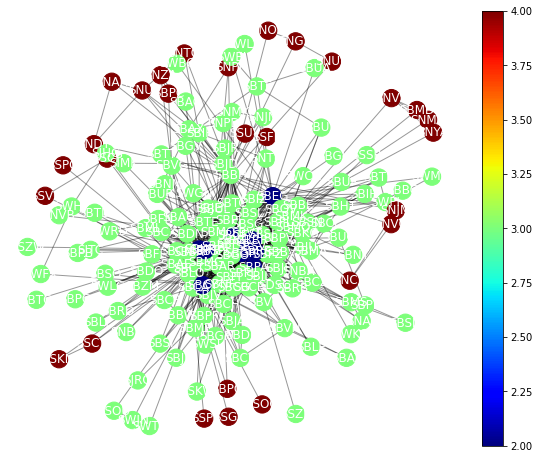

In [41]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [43]:
# the diameter of networks is the maximum eccentricy
print("Diameter of network (2019): {}".format(nx.diameter(G_2019)))

# whom are in the diamter
print([k for k,v in nx.eccentricity(G_2019).items() if v == nx.diameter(G_2019)])

Diameter of network (2019): 4
['SBPC', 'SSKM', 'SNGX', 'SNOS', 'SSFB', 'SBPO', 'SSOG', 'SNDT', 'SSCP', 'SNCT', 'SSPI', 'SSGY', 'SNVS', 'SNPJ', 'SNTO', 'SSUV', 'SNUH', 'SSPG', 'SSCT', 'SNVC', 'SNYA', 'SNMZ', 'SNAR', 'SBMD', 'SNJM', 'SNZA', 'SNUI', 'SSVL']


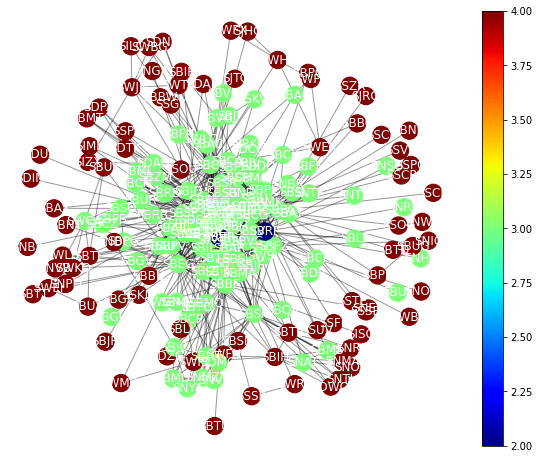

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

In [44]:
# the diameter of networks is the maximum eccentricy
print("Diameter of network (2020): {}".format(nx.diameter(G_2020)))

# whom are in the diamter
print([k for k,v in nx.eccentricity(G_2020).items() if v == nx.diameter(G_2020)])

Diameter of network (2020): 4
['SNGA', 'SIMK', 'SSKM', 'SBBG', 'SSCN', 'SBNM', 'SBTD', 'SBBU', 'SBTF', 'SWPI', 'SBAX', 'SJRG', 'SBBW', 'SBMT', 'SDZG', 'SDIM', 'SSFB', 'SNOB', 'SSZR', 'SNVB', 'SNPD', 'SBPO', 'SSOG', 'SBJR', 'SBPK', 'SBIH', 'SSTE', 'SBLJ', 'SWBG', 'SWKO', 'SSCP', 'SSSB', 'SSPI', 'SNWS', 'SNOX', 'SWTS', 'SSGY', 'SBIP', 'SDTK', 'SWEI', 'SWHP', 'SWMW', 'SIZX', 'SDNM', 'SBTU', 'SSUV', 'SBTT', 'SWBE', 'SNBA', 'SNEB', 'SBUA', 'SSPG', 'SWFX', 'SSCT', 'SBUG', 'SNIG', 'SWEK', 'SILC', 'SWJN', 'SBTB', 'SWPY', 'SWLB', 'SNDC', 'SWFN', 'SDUB', 'SNTI', 'SSVL', 'SBSM', 'SNMA', 'SBUY', 'SJHG', 'SSOU', 'SDWQ', 'SNRJ', 'SISO', 'SDPA', 'SWRF', 'SSSK', 'SDAM', 'SJTC', 'SBNT', 'SBGS']


## NX Periphery/Radius

In [50]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
nx.periphery(G_2019)

['SBPC',
 'SSKM',
 'SNGX',
 'SNOS',
 'SSFB',
 'SBPO',
 'SSOG',
 'SNDT',
 'SSCP',
 'SNCT',
 'SSPI',
 'SSGY',
 'SNVS',
 'SNPJ',
 'SNTO',
 'SSUV',
 'SNUH',
 'SSPG',
 'SSCT',
 'SNVC',
 'SNYA',
 'SNMZ',
 'SNAR',
 'SBMD',
 'SNJM',
 'SNZA',
 'SNUI',
 'SSVL']

In [47]:
# the radius of a network is the minimum eccentricity
print("Radius of network(2019): {}".format(nx.radius(G_2019)))
print([k for k,v in nx.eccentricity(G_2019).items() if v == nx.radius(G_2019)])

Radius of network(2019): 2
['SBGL', 'SBCF', 'SBPA', 'SBGR', 'SBKP', 'SBCY', 'SBEG', 'SBBR', 'SBRF', 'SBRP']


In [49]:
# the center of a network is a set all nodes whose eccentricity equal the radius
nx.center(G_2019)

['SBGL',
 'SBCF',
 'SBPA',
 'SBGR',
 'SBKP',
 'SBCY',
 'SBEG',
 'SBBR',
 'SBRF',
 'SBRP']

In [51]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
nx.periphery(G_2020)

['SNGA',
 'SIMK',
 'SSKM',
 'SBBG',
 'SSCN',
 'SBNM',
 'SBTD',
 'SBBU',
 'SBTF',
 'SWPI',
 'SBAX',
 'SJRG',
 'SBBW',
 'SBMT',
 'SDZG',
 'SDIM',
 'SSFB',
 'SNOB',
 'SSZR',
 'SNVB',
 'SNPD',
 'SBPO',
 'SSOG',
 'SBJR',
 'SBPK',
 'SBIH',
 'SSTE',
 'SBLJ',
 'SWBG',
 'SWKO',
 'SSCP',
 'SSSB',
 'SSPI',
 'SNWS',
 'SNOX',
 'SWTS',
 'SSGY',
 'SBIP',
 'SDTK',
 'SWEI',
 'SWHP',
 'SWMW',
 'SIZX',
 'SDNM',
 'SBTU',
 'SSUV',
 'SBTT',
 'SWBE',
 'SNBA',
 'SNEB',
 'SBUA',
 'SSPG',
 'SWFX',
 'SSCT',
 'SBUG',
 'SNIG',
 'SWEK',
 'SILC',
 'SWJN',
 'SBTB',
 'SWPY',
 'SWLB',
 'SNDC',
 'SWFN',
 'SDUB',
 'SNTI',
 'SSVL',
 'SBSM',
 'SNMA',
 'SBUY',
 'SJHG',
 'SSOU',
 'SDWQ',
 'SNRJ',
 'SISO',
 'SDPA',
 'SWRF',
 'SSSK',
 'SDAM',
 'SJTC',
 'SBNT',
 'SBGS']

In [52]:
# the radius of a network is the minimum eccentricity
print("Radius of network(2020): {}".format(nx.radius(G_2020)))
print([k for k,v in nx.eccentricity(G_2020).items() if v == nx.radius(G_2020)])

Radius of network(2020): 2
['SBGL', 'SBKP', 'SBBR', 'SBRF']


In [53]:
# the center of a network is a set all nodes whose eccentricity equal the radius
nx.center(G_2020)

['SBGL', 'SBKP', 'SBBR', 'SBRF']

## Degree Centrality

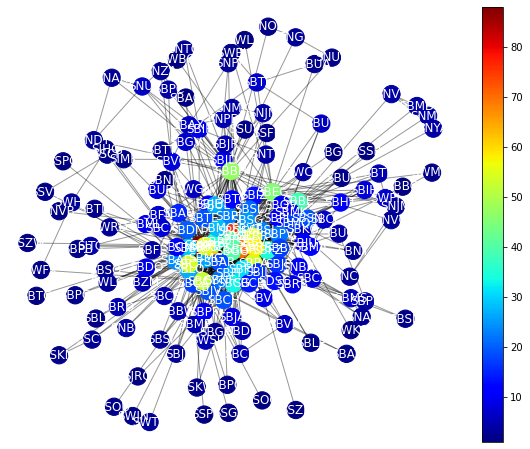

In [54]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

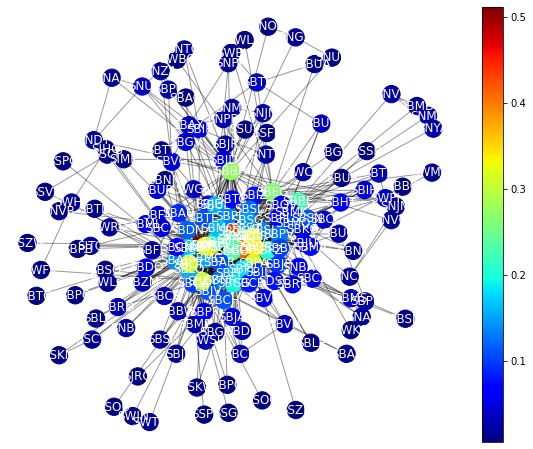

In [55]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree_centrality(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

In [56]:
nx.degree_centrality(G_2019)

{'SBAE': 0.13953488372093023,
 'SBAQ': 0.005813953488372093,
 'SBAR': 0.10465116279069767,
 'SBAT': 0.011627906976744186,
 'SBAU': 0.0872093023255814,
 'SBAX': 0.03488372093023256,
 'SBBE': 0.22674418604651161,
 'SBBG': 0.005813953488372093,
 'SBBH': 0.27325581395348836,
 'SBBR': 0.31976744186046513,
 'SBBV': 0.09883720930232558,
 'SBBW': 0.029069767441860465,
 'SBCA': 0.09883720930232558,
 'SBCB': 0.08139534883720931,
 'SBCF': 0.4418604651162791,
 'SBCG': 0.19186046511627908,
 'SBCH': 0.11046511627906977,
 'SBCJ': 0.040697674418604654,
 'SBCN': 0.05813953488372093,
 'SBCP': 0.029069767441860465,
 'SBCR': 0.029069767441860465,
 'SBCT': 0.313953488372093,
 'SBCX': 0.046511627906976744,
 'SBCY': 0.3023255813953488,
 'SBCZ': 0.046511627906976744,
 'SBDB': 0.029069767441860465,
 'SBDN': 0.11627906976744186,
 'SBDO': 0.05232558139534883,
 'SBEG': 0.2616279069767442,
 'SBFE': 0.023255813953488372,
 'SBFI': 0.1511627906976744,
 'SBFL': 0.18023255813953487,
 'SBFN': 0.040697674418604654,
 'SBF

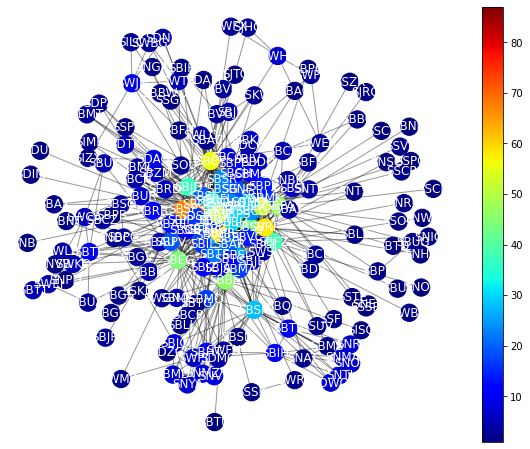

In [57]:
# the degree of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree.png', transparent=True,dpi=300)
plt.show()

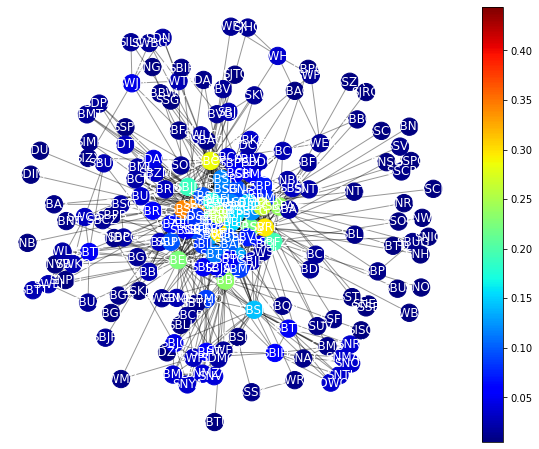

In [58]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.degree_centrality(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

In [60]:
nx.degree_centrality(G_2020)

{'SBAC': 0.01020408163265306,
 'SBAE': 0.06632653061224489,
 'SBAQ': 0.00510204081632653,
 'SBAR': 0.1020408163265306,
 'SBAT': 0.02040816326530612,
 'SBAU': 0.030612244897959183,
 'SBAX': 0.01020408163265306,
 'SBBE': 0.2346938775510204,
 'SBBG': 0.01020408163265306,
 'SBBH': 0.1530612244897959,
 'SBBR': 0.29591836734693877,
 'SBBU': 0.02551020408163265,
 'SBBV': 0.08673469387755102,
 'SBBW': 0.01020408163265306,
 'SBCA': 0.03571428571428571,
 'SBCB': 0.0510204081632653,
 'SBCF': 0.336734693877551,
 'SBCG': 0.12244897959183673,
 'SBCH': 0.0510204081632653,
 'SBCJ': 0.061224489795918366,
 'SBCN': 0.02040816326530612,
 'SBCP': 0.015306122448979591,
 'SBCR': 0.015306122448979591,
 'SBCT': 0.26530612244897955,
 'SBCX': 0.02551020408163265,
 'SBCY': 0.2857142857142857,
 'SBCZ': 0.015306122448979591,
 'SBDB': 0.015306122448979591,
 'SBDN': 0.07653061224489795,
 'SBDO': 0.030612244897959183,
 'SBEG': 0.22448979591836732,
 'SBFE': 0.015306122448979591,
 'SBFI': 0.09693877551020408,
 'SBFL': 0

## Betweenness Centrality

In [61]:
nx.betweenness_centrality(G_2019)

{'SBAE': 0.002742517905164037,
 'SBAQ': 0.0,
 'SBAR': 0.0004910502914647051,
 'SBAT': 0.0,
 'SBAU': 0.0007997562794212688,
 'SBAX': 0.0007481236531504126,
 'SBBE': 0.05941014457095068,
 'SBBG': 0.0,
 'SBBH': 0.1577766784313359,
 'SBBR': 0.02455102916586188,
 'SBBV': 0.000514788194060444,
 'SBBW': 0.0,
 'SBCA': 0.00022033498139478755,
 'SBCB': 0.0009880918417763279,
 'SBCF': 0.09341666358662422,
 'SBCG': 0.012642525790199614,
 'SBCH': 0.003611754590795197,
 'SBCJ': 1.4681700728212358e-05,
 'SBCN': 8.31104462275413e-06,
 'SBCP': 0.00026419316806354867,
 'SBCR': 0.0003072257188324259,
 'SBCT': 0.13918409287718853,
 'SBCX': 0.0,
 'SBCY': 0.11888643497831043,
 'SBCZ': 0.0,
 'SBDB': 0.00010648896847254629,
 'SBDN': 0.0015431497756530968,
 'SBDO': 6.378546387434554e-05,
 'SBEG': 0.11530165684572774,
 'SBFE': 0.0,
 'SBFI': 0.0005331340956128928,
 'SBFL': 0.006720636763522451,
 'SBFN': 4.857104000310854e-06,
 'SBFZ': 0.012388722139170387,
 'SBGL': 0.06520458207204229,
 'SBGO': 0.009445734645657

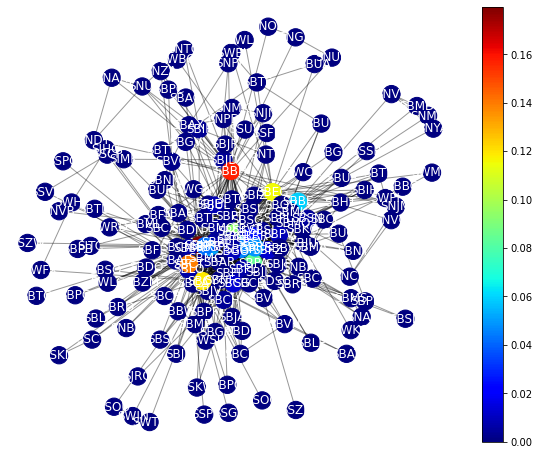

In [62]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2019,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(G_2019)).values())

# draw edges
nx.draw_networkx_edges(G_2019,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2019,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2019, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

In [65]:
nx.betweenness_centrality(G_2020)

{'SBAC': 0.0,
 'SBAE': 0.0016872629385150035,
 'SBAQ': 0.0,
 'SBAR': 0.0006309580006597277,
 'SBAT': 3.8783291941064034e-05,
 'SBAU': 0.0,
 'SBAX': 0.0,
 'SBBE': 0.09531318585210478,
 'SBBG': 0.0,
 'SBBH': 0.01382371273774289,
 'SBBR': 0.04351290457555117,
 'SBBU': 6.541077969649398e-06,
 'SBBV': 0.0033841261778189418,
 'SBBW': 0.0,
 'SBCA': 4.1530653775551725e-05,
 'SBCB': 0.00014378970468104078,
 'SBCF': 0.09365989314433537,
 'SBCG': 0.004149658472213189,
 'SBCH': 7.860837923632271e-05,
 'SBCJ': 8.955467833025192e-05,
 'SBCN': 0.0,
 'SBCP': 0.0,
 'SBCR': 2.6164311878597592e-05,
 'SBCT': 0.135965364087805,
 'SBCX': 0.0010561621311690578,
 'SBCY': 0.1494710855577649,
 'SBCZ': 0.0,
 'SBDB': 2.6164311878597592e-05,
 'SBDN': 0.0022240929141998382,
 'SBDO': 0.0,
 'SBEG': 0.10114717648815803,
 'SBFE': 0.0,
 'SBFI': 0.003847193143361693,
 'SBFL': 0.004060893625846645,
 'SBFN': 0.0,
 'SBFZ': 0.05951996910268145,
 'SBGL': 0.04719406151692171,
 'SBGO': 0.009503438039849883,
 'SBGR': 0.043595150

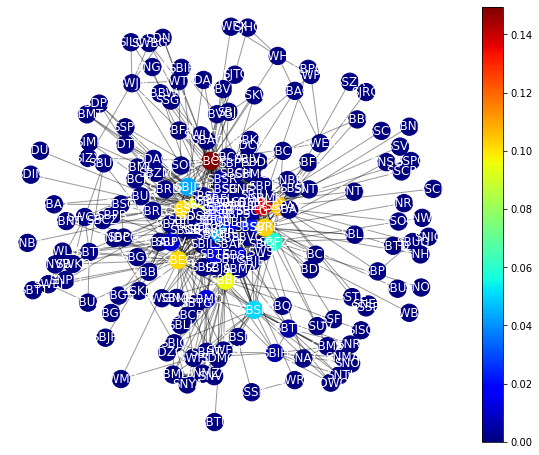

In [64]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G_2020,seed=123456789,k=0.3)
# color of nodes
color = list(dict(nx.betweenness_centrality(G_2020)).values())

# draw edges
nx.draw_networkx_edges(G_2020,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_2020,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# draw labels
nx.draw_networkx_labels(G_2020, pos=pos,
                        font_color='white', ax=ax)


plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()